<a href="https://colab.research.google.com/github/Ian-Leidner/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm
from google.colab import drive

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Step 1. Load the datasets

In [5]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
hs1 = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header='infer')

In [7]:
hs1.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


In [0]:
hs1.columns=['report_date', 'boro', 'community_district', 'adult_fam_comm_hotel', 'adult_family_shelter', 'adult_shelter', 'adult_shelter_comm_hotel', 'fwc_cluster', 'fwc_comm_hotel', 'fwc_shelter']

In [0]:
#Step 2. Filter the shelter count dataframe to only keep rows where the value in the 'Report Date' column is '09/30/2019'

In [0]:
hsdate = hs1[hs1.report_date == '09/30/2019']

In [11]:
hsdate.head()

,report_date,boro,community_district,adult_fam_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter
624,09/30/2019,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
625,09/30/2019,Bronx,202,NaN,1.0,NaN,NaN,2.0,NaN,5.0
626,09/30/2019,Bronx,203,NaN,3.0,6.0,NaN,3.0,2.0,9.0
627,09/30/2019,Bronx,204,NaN,NaN,2.0,1.0,14.0,NaN,15.0
628,09/30/2019,Bronx,205,NaN,1.0,3.0,NaN,12.0,NaN,5.0


In [0]:
#Step 3. Create a new column in the shelter count dataframe that calculates the sum of all the individual count columns: 'Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter'

In [0]:
hsdate = hs1.fillna(0)

In [14]:
hsdate.head()

,report_date,boro,community_district,adult_fam_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter
0,07/31/2018,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0
1,07/31/2018,Bronx,202,0.0,1.0,0.0,0.0,3.0,0.0,6.0
2,07/31/2018,Bronx,203,0.0,2.0,5.0,0.0,5.0,2.0,9.0
3,07/31/2018,Bronx,204,0.0,0.0,2.0,0.0,18.0,0.0,14.0
4,07/31/2018,Bronx,205,0.0,2.0,3.0,0.0,12.0,0.0,5.0


In [0]:
hsdate['count1'] = hsdate[['adult_fam_comm_hotel','adult_family_shelter','adult_shelter','adult_shelter_comm_hotel','fwc_cluster','fwc_comm_hotel','fwc_shelter']].sum(axis=1)

In [16]:
hsdate.head()

,report_date,boro,community_district,adult_fam_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter,count1
0,07/31/2018,Bronx,201,0.0,1.0,2.0,0.0,4.0,1.0,7.0,15.0
1,07/31/2018,Bronx,202,0.0,1.0,0.0,0.0,3.0,0.0,6.0,10.0
2,07/31/2018,Bronx,203,0.0,2.0,5.0,0.0,5.0,2.0,9.0,23.0
3,07/31/2018,Bronx,204,0.0,0.0,2.0,0.0,18.0,0.0,14.0,34.0
4,07/31/2018,Bronx,205,0.0,2.0,3.0,0.0,12.0,0.0,5.0,22.0


In [0]:
#Step 4. From the 311 dataset, create a subset of all the 311 requests where complaint_type == 'Homeless Person Assistance'

In [0]:
homeless = df[df.complaint_type == 'Homeless Person Assistance']

In [19]:
homeless.head()

,Unnamed: 0,Unnamed: 0.1,unique_key,created_date,closed_date,agency,agency_name,complaint_type,descriptor,location_type,incident_zip,incident_address,street_name,cross_street_1,cross_street_2,intersection_street_1,intersection_street_2,address_type,city,landmark,facility_type,status,due_date,resolution_description,resolution_action_updated_date,community_board,bbl,borough,x_coordinate_(state_plane),y_coordinate_(state_plane),open_data_channel_type,park_facility_name,park_borough,vehicle_type,taxi_company_borough,taxi_pick_up_location,bridge_highway_name,bridge_highway_direction,road_ramp,bridge_highway_segment,latitude,longitude,location,borocd
0,0,0,39888071,08/01/2018 12:00:10 AM,08/01/2018 01:52:46 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Other,10029,200 EAST 109 STREET,EAST 109 STREET,3 AVENUE,2 AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:00:10 AM,The mobile outreach response team offered serv...,08/01/2018 01:52:46 AM,11 MANHATTAN,1.016560e+09,MANHATTAN,1000049.0,228317.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.793339,-73.942942,"(40.79333937834769, -73.9429417746998)",111.0
46,46,46,39887175,08/01/2018 12:15:12 AM,08/01/2018 01:29:09 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10016,478 THIRD AVENUE,THIRD AVENUE,EAST 32 STREET,EAST 33 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:12 AM,The mobile outreach response team offered serv...,08/01/2018 01:29:09 AM,06 MANHATTAN,1.008880e+09,MANHATTAN,990113.0,210611.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.744753,-73.978841,"(40.74475319239264, -73.97884116795397)",106.0
47,47,47,39883411,08/01/2018 12:15:39 AM,08/01/2018 01:33:51 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Residential Building/House,10035,445 EAST 120 STREET,EAST 120 STREET,1 AVENUE,PLEASANT AVENUE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:15:39 AM,The mobile outreach response team went to the ...,08/01/2018 01:33:51 AM,11 MANHATTAN,1.018080e+09,MANHATTAN,1003119.0,229980.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.797898,-73.931850,"(40.797897839118114, -73.93184977463629)",111.0
145,150,150,39881402,08/01/2018 12:59:43 AM,08/01/2018 02:10:40 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10027,624 WEST 125 STREET,WEST 125 STREET,BROADWAY,ST CLAIR PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 01:59:43 AM,The mobile outreach response team went to the ...,08/01/2018 02:10:40 AM,09 MANHATTAN,1.019950e+09,MANHATTAN,995623.0,236699.0,MOBILE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.816352,-73.958912,"(40.81635246371125, -73.95891211015879)",109.0
371,394,394,39888951,08/01/2018 04:10:47 AM,08/01/2018 05:18:59 AM,DHS,Operations Unit - Department of Homeless Services,Homeless Person Assistance,NaN,Street/Sidewalk,10003,115 EAST 14 STREET,EAST 14 STREET,4 AVENUE,IRVING PLACE,NaN,NaN,ADDRESS,NEW YORK,NaN,NaN,Closed,08/01/2018 05:10:47 AM,The individual was found and outreach assistan...,08/01/2018 05:18:59 AM,05 MANHATTAN,1.008708e+09,MANHATTAN,987266.0,206735.0,PHONE,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.734116,-73.989117,"(40.73411596377878, -73.98911737171056)",105.0


In [0]:
#Step 5. Group the 311 subset by 'borocd' to get the count of 'Homeless Person Assistance' requests per community district

In [0]:
count_homeless = homeless.groupby('borocd').size().reset_index(name='count_of_311_requests')

In [22]:
count_homeless.head()

,borocd,count_of_311_requests
0,101.0,758
1,102.0,965
2,103.0,520
3,104.0,1055
4,105.0,3020


In [0]:
cd_data = pd.merge(left=count_homeless, right=hsdate, left_on='borocd', right_on='community_district')

In [0]:
cd_data = cd_data.drop_duplicates()

In [25]:
cd_data.head()

,borocd,count_of_311_requests,report_date,boro,community_district,adult_fam_comm_hotel,adult_family_shelter,adult_shelter,adult_shelter_comm_hotel,fwc_cluster,fwc_comm_hotel,fwc_shelter,count1
0,101.0,758,07/31/2018,Manhattan,101,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1,101.0,758,08/31/2018,Manhattan,101,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
2,101.0,758,09/30/2018,Manhattan,101,0.0,0.0,7.0,0.0,0.0,2.0,0.0,9.0
3,101.0,758,10/31/2018,Manhattan,101,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
4,101.0,758,11/30/2018,Manhattan,101,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0


In [0]:
#Step 7. Produce a scatter plot of the data using the matplotlib package. What is your initial impression on whether there is a correlation between number of shelters and count of 311 homeless service requests?

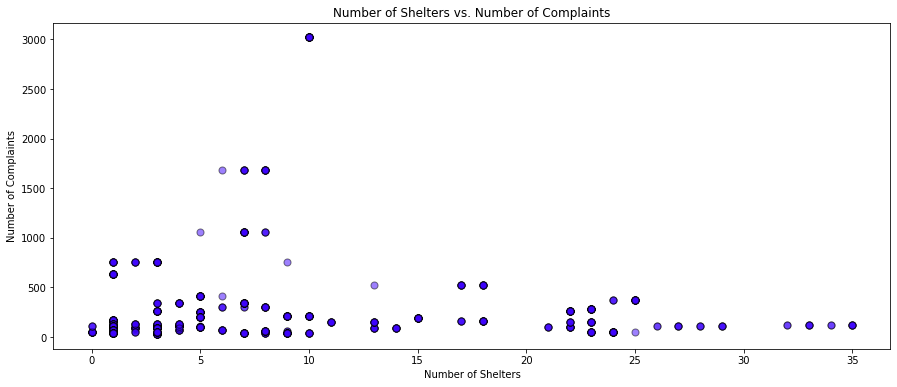

In [27]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(cd_data['count1']), 
    np.array(cd_data.count_of_311_requests), 
    s=50, 
    c='#3d03fc', 
    edgecolors='black', 
    alpha=0.5) 

plt.title('Number of Shelters vs. Number of Complaints')
plt.xlabel('Number of Shelters')
plt.ylabel('Number of Complaints')

plt.show()


In [0]:
#The highest number of complaints actually exists in areas with 10 or fewer shelters. This may show that there are a smaller number of shelters that have a disproportionate number of incidents or a disproporionate number of sensitive neighbors. 

In [0]:
#Step 8. Use np.corrcoef(x, y) to identify the correlation coefficient between count of total shelter buildings and count of homeless requests per community district.

In [40]:
x = np.array(cd_data.count1)
y = np.array(cd_data.count_of_311_requests)

np.corrcoef(x, y)

array([[ 1.        , -0.01125285],
       [-0.01125285,  1.        ]])

In [0]:
#Step 9. Perform a linear regression with count of total shelter buildings as the independent variable and count of homeless requests as the dependent variable

In [41]:
y = np.array(cd_data.count_of_311_requests)

x = np.array(cd_data['count1'])
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

print(model.summary())

[[1. 2.]
 [1. 2.]
 [1. 9.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.09042
Date:                Wed, 04 Dec 2019   Prob (F-statistic):              0.764
Time:                        01:28:58   Log-Likelihood:                -5440.7
No. Observations:                 716   AIC:                         1.089e+04
Df Residuals:                     714   BIC:                         1.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [0]:
#Step 10. Produce a scatter plot of the data with the line of best fit from your linear regression using the matplotlib package

In [0]:
p = model.params

r2 = model.rsquared

In [43]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = -0.64x + 297.16; R2 = 0.0


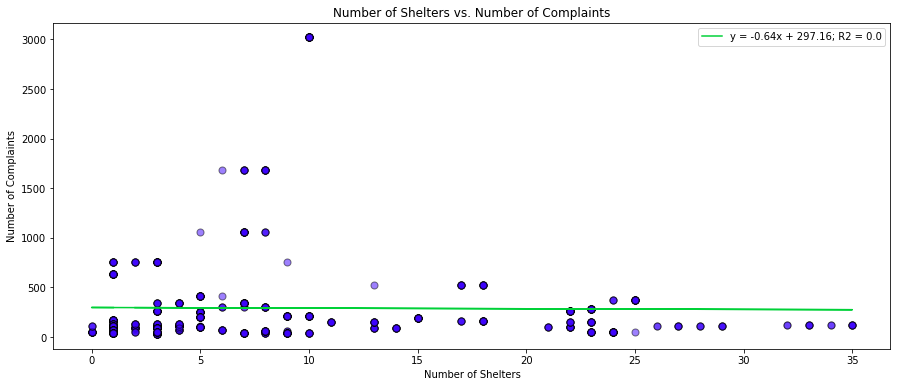

In [44]:


x_dummy = np.array(cd_data.count1)


plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(cd_data['count1']), 
    np.array(cd_data['count_of_311_requests']), 
    s=50, 
    c='#3d03fc', 
    edgecolors='black', 
    alpha=0.5) 

plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', 
    label=label)

plt.title('Number of Shelters vs. Number of Complaints')
plt.xlabel('Number of Shelters')
plt.ylabel('Number of Complaints')
plt.legend()

plt.show()

In [0]:
import seaborn as sns


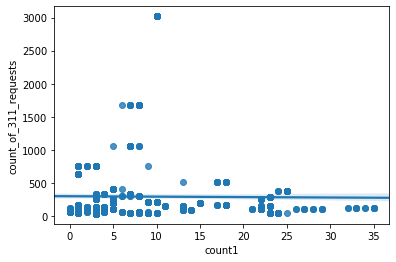

In [46]:
sns.regplot(
    x=cd_data['count1'],
    y=cd_data['count_of_311_requests'])

In [0]:
#Step 11: Write a sentence or two explaining the results of your analysis. What do the numbers and chart tell you about the relationship between concentration of homeless shelters vs. frequency of 311 requests related to homelessness?

In [0]:
#There does not seem to be strong evidence of a relationship between concentration of shelters and the number of complaints based on a regression line that is essentially flat and an R2 value that is 0. 
#More analysis is needed to understand why some areas with the lowest number of shelters has the highest number of complaints. It could be that there are areas with few shelters but that attract large numbers of homeless individuals. 